In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')
from jsm_massfunc import CSMF, cumulative, CSMF_old, H2H_CSMF
from jsm_datareduc import prep_data
import galhalo
import anaclass


### first just a single realization! see how it changes with a change in slope

In [3]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass.npy")
massmat.prep_data()

In [4]:
index = 1232
lgMh = massmat.lgMh[index]
lgMs = galhalo.lgMs_D22_det(lgMh)
mass_bins = np.linspace(3,9,45)
CSMF_counts = cumulative(lgMs, mass_bins)

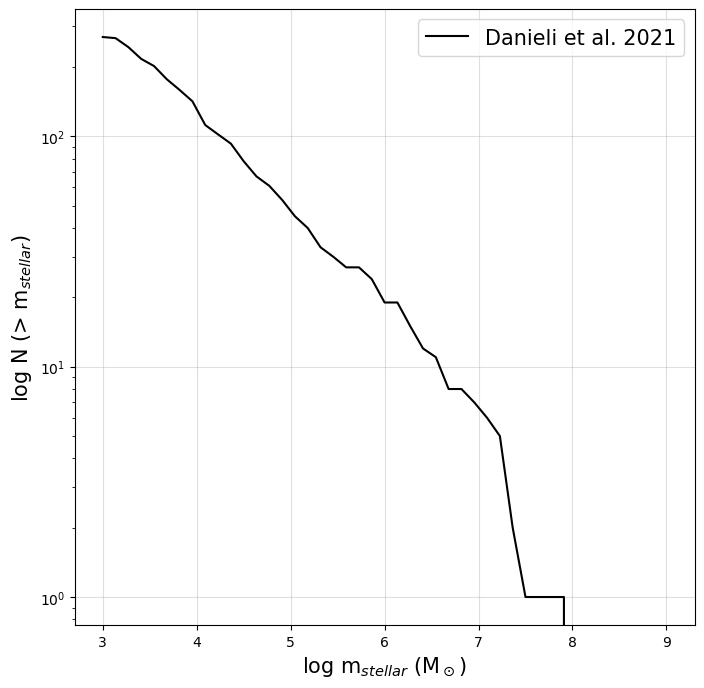

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(mass_bins, CSMF_counts, color="black", label="Danieli et al. 2021")
plt.yscale("log")
plt.grid(alpha=0.4)
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend(fontsize=15)
plt.show()

### now seeing what happens if you change the slope of the SHMR

In [6]:
alpha_pix = 25
alpha = np.linspace(1.5, 3, alpha_pix)
mat = np.zeros(shape=(alpha_pix, 45))

In [7]:
for i,val in enumerate(alpha):
    lgMs = galhalo.lgMs_M23_det(lgMh,val)
    mat[i] = cumulative(lgMs, mass_bins)

In [26]:
halo_masses = np.linspace(7,12,100)

B13_s = galhalo.lgMs_B13(lgMh[~np.isnan(lgMh)], z=0)
RP17_s = galhalo.lgMs_RP17(lgMh[~np.isnan(lgMh)], z=0)

B13_c = cumulative(galhalo.lgMs_B13(B13_s, z=0), mass_bins)
RP17_c = cumulative(galhalo.lgMs_RP17(RP17_s, z=0), mass_bins)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:190: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\
/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:244: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


In [27]:
norm = mpl.colors.Normalize(vmin=alpha.min(), vmax=alpha.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)

colors = mpl.cm.viridis(np.linspace(0, 1, alpha_pix))

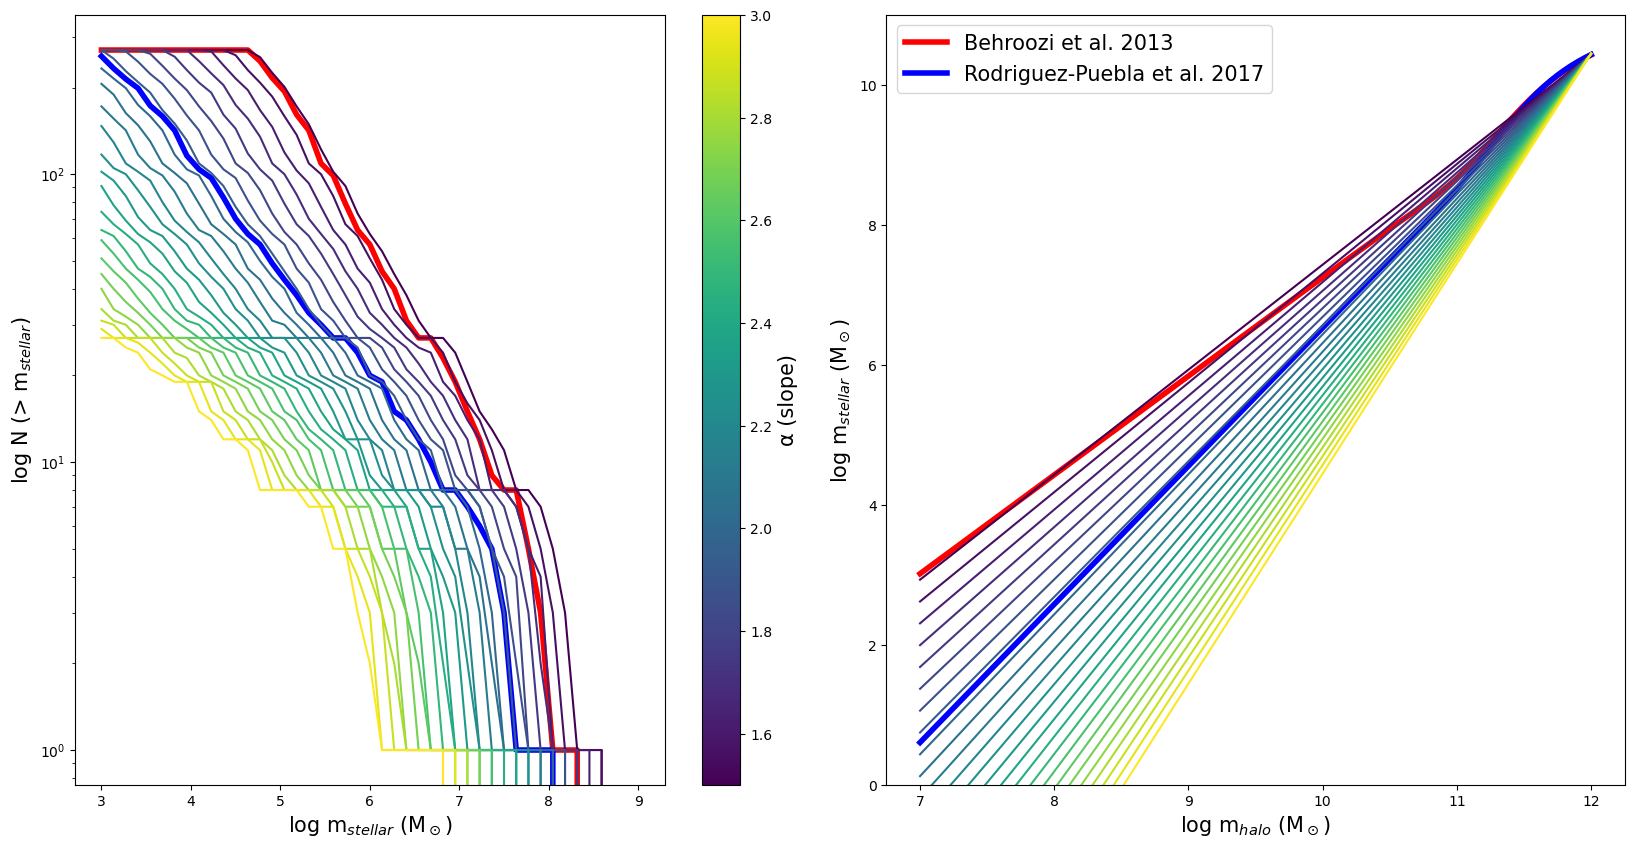

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,10), sharey=False)

axs[0].plot(mass_bins, B13_c, lw=4, color="red")
axs[0].plot(mass_bins, RP17_c, lw=4, color="blue")

axs[1].plot(halo_masses, B13_s, lw=4, label="Behroozi et al. 2013", color="red")
axs[1].plot(halo_masses, RP17_s, lw=4, label="Rodriguez-Puebla et al. 2017", color="blue")


for i in range(alpha_pix):
    axs[1].plot(halo_masses, galhalo.lgMs_M23_det(halo_masses, a=alpha[i]), color=colors[i])
    axs[0].plot(mass_bins, mat[i], color=colors[i])
    
axs[1].set_ylabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[1].set_xlabel("log m$_{halo}$ (M$_\odot$)", fontsize=15)
axs[1].set_ylim(0,11)
axs[1].legend(fontsize=15)


cb = fig.colorbar(cmap, ax=axs[0])
cb.set_label(label='α (slope)', fontsize=15)

axs[0].set_yscale("log")
axs[0].set_xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
axs[0].set_ylabel("log N (> m$_{stellar}$)", fontsize=15)
#axs[1].set_yscale("log")
#axs[1].set_ylim(10**0, 10**2.3)
plt.subplots_adjust(wspace=0.1)
plt.show()